<hr style="height:0px; visibility:hidden;" />

<h1><center><b>GL4U: Introduction<b></center></h1>

<h1><center>4. Sequencing Data QC</center></h1>

<div class="alert alert-block alert-success">
Sequencing data QC (quality control) is an essential step in virtually all <a href="https://github.com/nasa/GeneLab-Training/tree/main/GL4U">GL4U</a> 'omics-specific module sets. So here we are going to quickly introduce the two most common sequencing formats and one of the most widely used tools for assessing and summarizing sequence quality. 🙂
</div>

---

<center>This is notebook 4
of 4 of GL4U's Introduction Module Set. It is expected that the previous notebooks have been completed already.</center>

---

[**Previous:** 3. R intro](03-R-intro.ipynb)
<br>

<div style="text-align: right"><a href="01-jupyter-intro.ipynb"><b>Back to:</b> 1. Jupyter intro</a></div>

---
---

# Table of Contents

* [1. Common sequencing formats](#common-sequencing-formats)
    * [Fasta format](#fasta)
    * [Fastq format](#fastq)
* [2. FastQC](#fastqc)

---
---

<a class="anchor" id="common-sequencing-formats"></a>

# 1. Common sequencing file formats

Two of the most common file formats for storing sequence information are fasta and fastq.

<a class="anchor" id="fasta"></a>

## Fasta format

*Fasta* is a format that holds sequencing data. It commonly has the extensions ".fasta" or ".fa" for nucleotide sequences, and usually ".faa" for amino-acid sequences. 

By definition, each sequence (or entry) in a fasta file needs to have 2 lines, where:

1. **Line 1** must begin with a ">" character followed by a unique identifier.
2. **Line 2** contains the sequence.

Here is an example of a nucleotide fasta file showing 2 entries:

> ```
> >seq_1
> ATGCGACCTCAAGCTACGAGGCTACTATAGTCATGCTGC
> >seq_2
> TCCGACTTCAAGCTAATGCTACCTACGAGGATTAA
> ```

<br>

<a class="anchor" id="fastq"></a>

## Fastq format

*Fastq* is a format that holds nucleotide sequencing data and their associated quality scores (described below). Fastq formatted files typically have the extensions ".fastq" or ".fq". This is the format raw reads from a sequencer are typically stored in, often holding millions of reads.

In fastq format, by definition each entry is referred to as a read and each read is comprised of 4 lines:

1. **Line 1** Must begin with an '@' character followed by a unique identifier, and if these are reads from a sequencer, this identifier will typically include information about the sequencing run such as the sequencing platform, run number, flow cell ID and cluster location, read number (forward/reverse), the sample index, and/or other information.  
2. **Line 2** Contains the sequence, written as base calls (A, T, C, G, or possibly an N representing any base if the base is uncertain). The sequence length will depend on how the sequencing run was set up.   
3. **Line 3** A separater line that always begins with a '+' character and can contain additional information, but usually doesn't.  
4. **Line 4** Contains the quality scores corresponding to each base in line 2, and there should always be one quality score for each base in the sequence. The quality score of a base is referred to as a Phred score and is encoded using ASCII characters as described [below](#phred).   

Here is an example of a single entry in a fastq file (here a read from an Illumina sequencer):

> ```
> @J00113:162:H7W32BBXX:1:1101:9658:1947 1:N:0:GGTGCG
> GTCAGTATCATGCTGCGGCTTCAAATCCGAAGTGATGTTTTGATGTGAAGTGAA
> +
> AAFFFJJJAAAAFAFFAFJAAAFJJJJJFFFJFFFJJFFJJJJJJJJJJJJJJJ
> ```

<br>

<a class="anchor" id="phred"></a>

### Quality scores in fastq format

When sequencers attempt to read the "sequence" of DNA bases, for each base they read, information about the confidence of that base being correct is captured in a quality score. These are known as [Phred quality scores](https://en.wikipedia.org/wiki/Phred_quality_score) or "Q" scores. 

These scores typically range from 0-42, with higher values meaning greater confidence that the base is correct. This is a logarithmic scale, such that, for example, if a base has an associated quality score of 20, there is an estimated 1 in 100 chance that it is incorrect (i.e., a 99% confidence that it is correct); if it has a quality score of 30, there is an estimated 1 in 1,000 chance it is incorrect (i.e., a 99.9% confidence that it is correct). Here is a summary table from the [Phred quality score wiki](https://en.wikipedia.org/wiki/Phred_quality_score):

<center>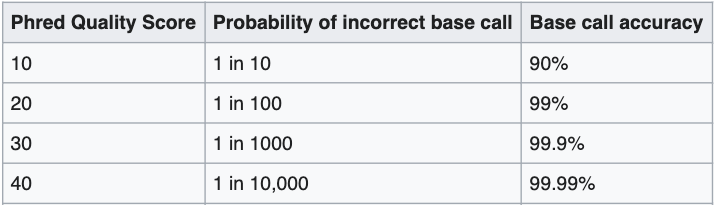</center>
<br>

To save space, in a fastq file, these numeric scores are encoded as single [ASCII](https://en.wikipedia.org/wiki/ASCII) characters, converted as described [here](http://drive5.com/usearch/manual/quality_score.html). 

<a class="anchor" id="fastqc"></a>

# 2. FastQC

Assessing the quality of fastq data is typically an essential step in the processing of sequencing data. For instance, when working with raw reads, it is important for determining if and how the reads need to be quality filtered and trimmed.

[FastQC](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/) is a widely used program for the assessment of fastq data. It checks and summarizes several different aspects of our data (which it refers to as modules), with the documentation for each linked on [this page](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/) and summarized below with some example figures from different read datasets. We'll touch on this as we go, but these modules are assessing things assuming a completely random and diverse set of sequences, which isn't always expected to be the case depending on what type of sequencing was done. So it's important to interpret these summary results in the context of what type of data we have.

- [**Basic statistics**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/1%20Basic%20Statistics.html)
  - This section includes general information including total sequences, sequence length, and %GC.

<center>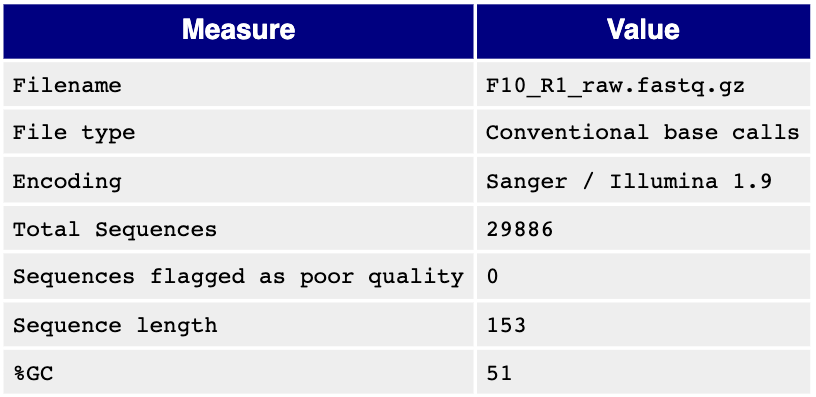</center>
<br>

**Looking at the basic statistics above:**

1. What is the read depth (i.e., total number of reads) for this sample?

2. What is the sequence length of the reads in this sample? Do all reads have the same sequence length (it's okay to take a guess)?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>
29,886 
    
This is the value indicated for the "Total Sequences" measure. 

</details>
</div>


<div class="alert alert-block alert-success">
<details>
<summary><b>Q2 Solution</b></summary>

<br>
153 as indicated by the "Sequence length" measure. 
    
Yes, all reads have the same sequence length here. If there were different sequence lengths, this value would be presented as a range (e.g., 49 - 153). 

</details>
</div>

<br>

---

- [**Per base sequence quality**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/2%20Per%20Base%20Sequence%20Quality.html)
  - This is an overview of all quality scores plotted as boxplots across the length of the reads.
    - The x-axis is the position in the reads, the y-axis is the quality score, red lines are the median values, and the blue line is the mean.
  
<center>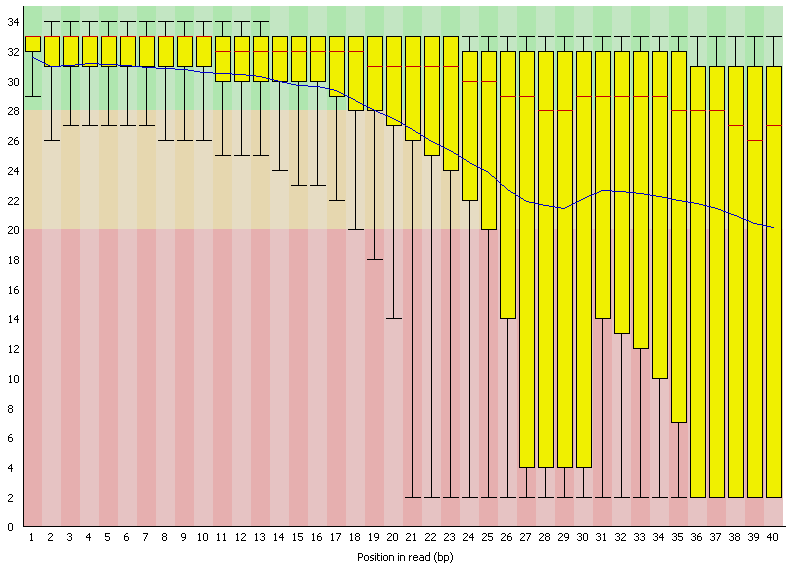</center>
<br>

**Looking at the quality score plot above:**

1. What is roughly the average quality score at base position 20?

2. What do you notice about the quality of the reads at the start vs at the end?

3. It is hard to know if we aren't used to seeing what quality profiles typically look like yet, but do you think these reads are of high quality? If not, do you think quality filtering can help?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>
The blue line indicates the mean, which is around 27 at base position 20.

</details>
</div>


<div class="alert alert-block alert-success">
<details>
<summary><b>Q2 Solution</b></summary>

<br>
Read quality decreases towards the end. This is typical for Illumina sequencing data.

</details>
</div>


<div class="alert alert-block alert-success">
<details>
<summary><b>Q3 Solution</b></summary>

<br>
They are not great currently, as the ends of the reads have many low-quality bases as indicated by the boxplots extending down so far. However, the median values are pretty high (indicated by the red bars inside the box plots), being up around 30 (which is a 1 in 1,000 probability of being wrong). This tells us that there is a good amount of high-quality data in there we can retain after filtering out the poor-quality bases. 

</details>
</div>

<br>

---

- [**Per tile sequence quality**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/12%20Per%20Tile%20Sequence%20Quality.html)
  - If the data are reads from an Illumina sequencer, with the required sequencer information in the fastq file, this plot will show a heatmap of quality scores across the reads relative to tiles in an Illumina flow cell. This may be particularly helpful to folks who maintain and run the sequencer as a way to monitor the health of the equipment.

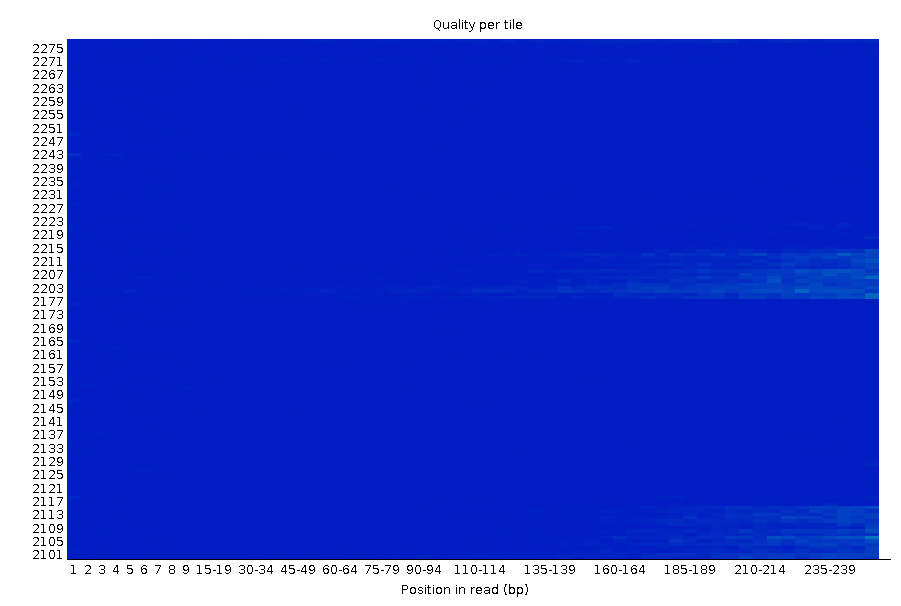
<br>

---

- [**Per base sequence content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/4%20Per%20Base%20Sequence%20Content.html)
  - This depicts a line graph showing the proportion of each base at each position across the sequences.
    - The x-axis is position in the sequences, and the y-axis is the percent each base was observed out of all bases in that location for all sequences. 

<center>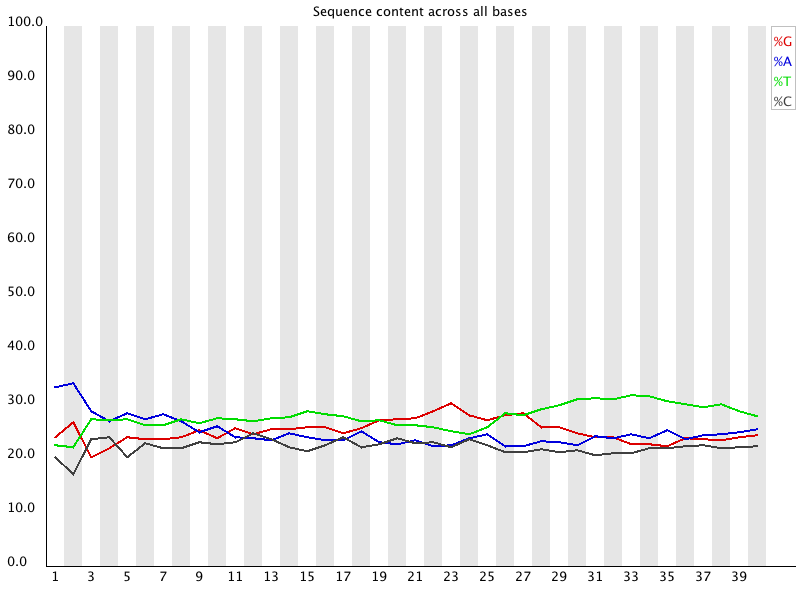</center>
<br>

In a non-biased library of sequences, we wouldn't expect any particular position in the sequence to have a greater proportion of any one base than any other position has for that base. In those scenarios, we expect these lines to run relatively parallel across the length of the sequences. But some data types, like amplicon sequencing (which is when we amplify and sequence multiple versions or copies of some portion of a target gene) will have base-proportions that vary wildly across the sequence. 

Here is an example from an amplicon dataset:

<center>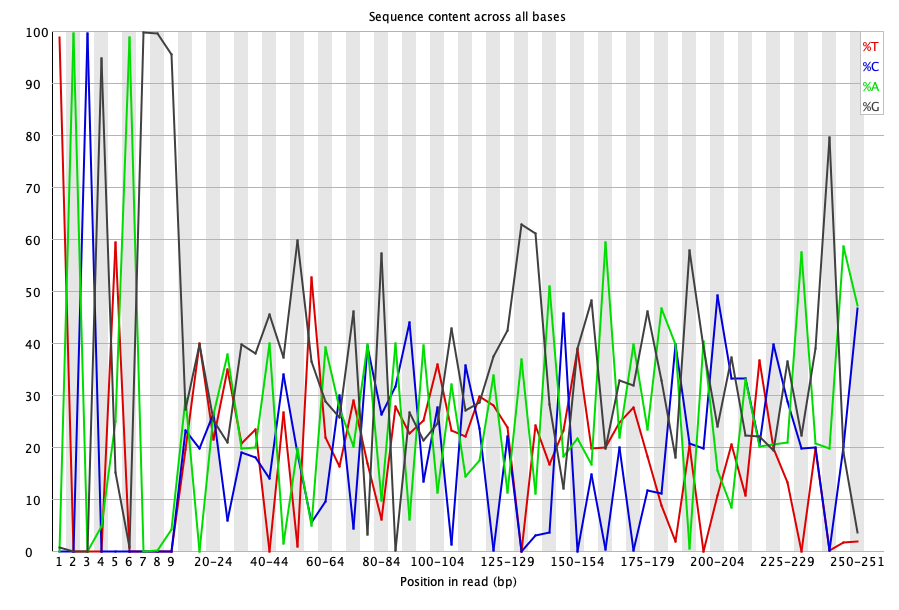</center>
<br>

And for whole-genome sequencing, typically there will be 2 sets of very clean parallel lines, with their position on the y-axis corresponding to the GC/AT-content of the genome that was sequenced:

<center>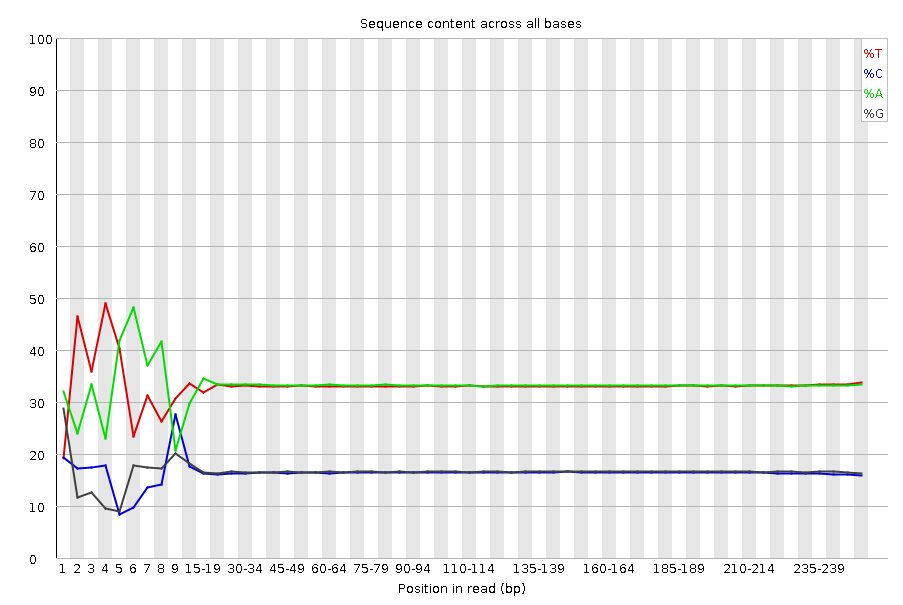</center>
<br>

For several data types, it is common for raw reads to have a biased sequence composition at the start of the reads like seen here (where the lines are a little more erratic at the start before stabilizing). As described in the [Per base sequence content documentation](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/4%20Per%20Base%20Sequence%20Content.html), this is typically because when we perform commonly used library preparation steps like random-primer amplification or transposase-mediated fragmentation, even though these are designed to be as random as possible, they can still introduce a slight technical bias. These biases generally can't just be trimmed off, but they don't tend to negatively affect analyses.

**Looking at this last plot of whole-genome sequencing data:**

1. A genome's GC-content is the percentage of bases that are G or C. What would you estimate the GC-content is of the genome that was used for this example?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>
The G (black) and C (blue) lines are stable at roughly 16 or 17%. So the GC-content of the source genome is likely to be around 32-34%.

</details>
</div>

<br>

---

- [**Per sequence GC content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/5%20Per%20Sequence%20GC%20Content.html)
  - This plots comparison curves of a modeled normal distribution of GC content (in blue) and what was observed in the data (in red).
    - The x-axis is mean GC content, and the y-axis is number of reads.

<center>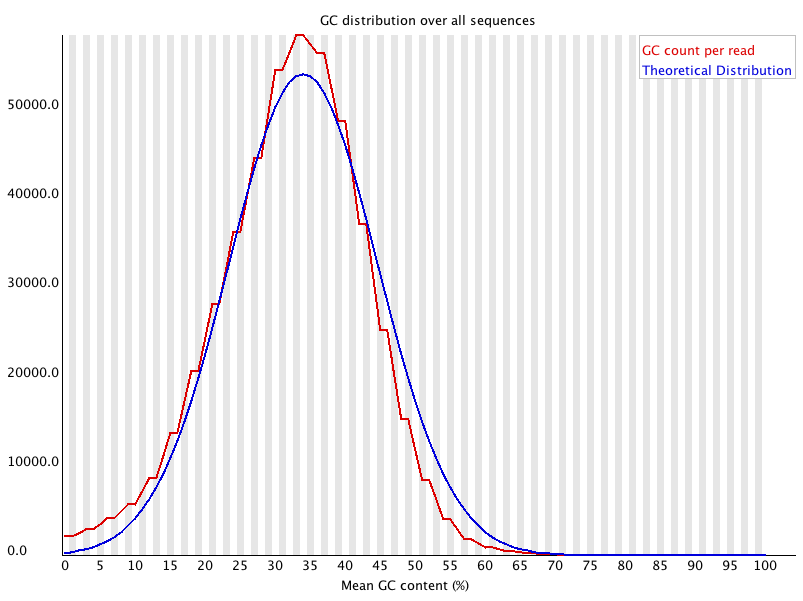</center>
<br>

Many types of sequencing will produce a generally normal distribution when plotting the mean GC-content of all reads, which is what this module is checking for. But certain types of sequencing, like amplicon sequencing (which is when we amplify and sequence multiple versions or copies of the same portion of target DNA), may present as a bimodal or multi-modal distribution just based on the sequence composition of what was targeted. So as with many, a "warning" or "failure" needs to be evaluated in the context of the data type being assessed.

When a normal distribution is expected, or largely shown like above, if a spike is observed in the actual data that is outside of the theoretical distribution, it could indicate a contaminant is present.

<br>

---

- [**Per base N content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/6%20Per%20Base%20N%20Content.html)
  - This is a plot depicting the frequency and location of Ns throughout the length of the sequences (which can be assigned when a base-call is uncertain). 

<center>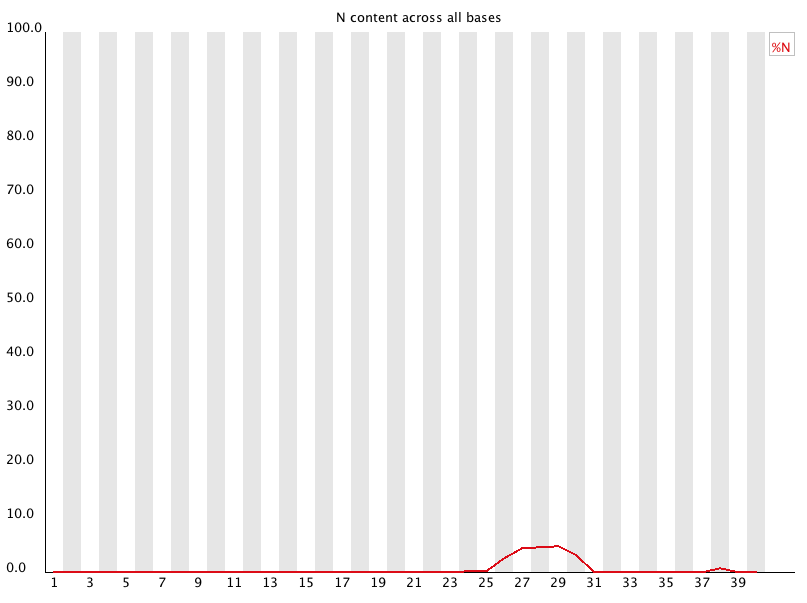</center>
<br>

**Looking at the per base N content plot above:**

1. Does it look like some sequences have Ns in them for these data?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>
Yes, from this example there appear to be a concentration of Ns in a small proportion of reads (< 10%) around positions 25-31, and then a little around position 38. 

</details>
</div>

<br>

---

- [**Sequence length distribution**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/7%20Sequence%20Length%20Distribution.html)
  - This is a plot showing the distribution of read lengths.

<center>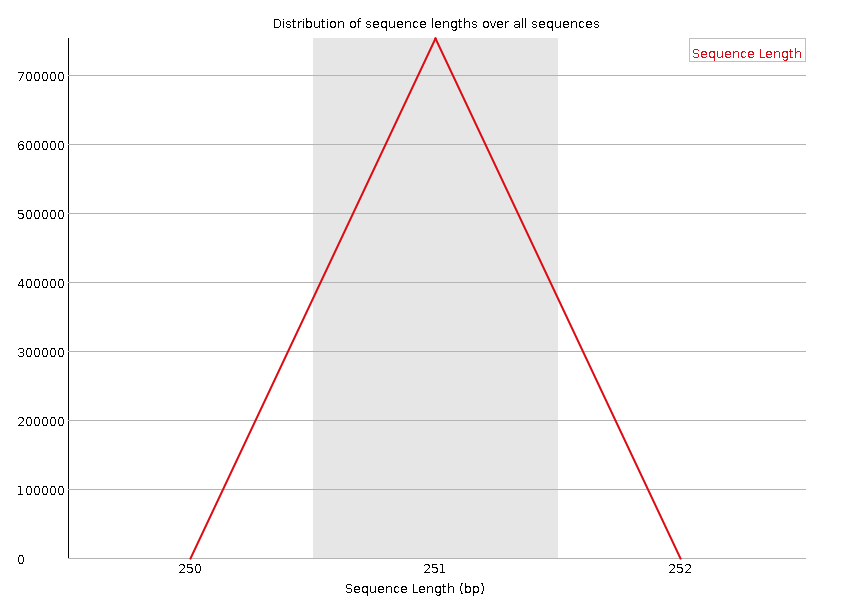</center>
<br>

**Looking at this sequence length distribution plot:**

1. What size does it look like the sequences were for this example?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>
The plot is showing they were all the same size of 251 bases.

</details>
</div>

<br>

---

- [**Sequence duplication levels**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/8%20Duplicate%20Sequences.html)
  - A plot showing the proportion of sequences detected in differing duplication levels.
    - The x-axis represents duplication level, and the y-axis shows the percent of sequences at the given duplication level, the blue line represents the starting data, and the red line represents a prediction of the data after some form of deduplication.

> Note that this is just comparing sequences (actually typically just the first 50 bases of the first 100,000 sequences to all the rest, as detailed in the [documentation](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/8%20Duplicate%20Sequences.html)). It is not intended to tell us anything about what might be true biological duplicates as opposed to technical duplicates (though some library preparation methods for sequencing can help with that).

<center>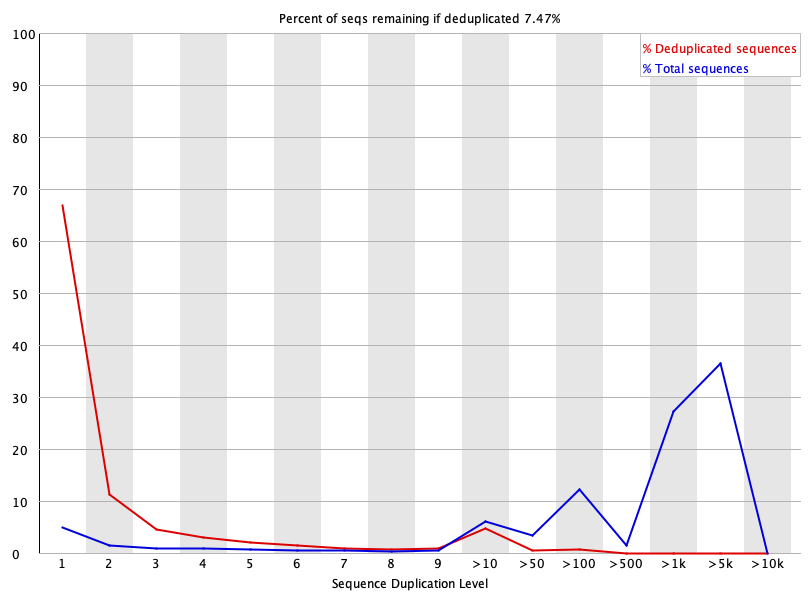</center>
<br>

Certain types of sequencing that aren't random and diverse, such as amplicon sequencing or whole-genome sequencing, are expected to show a lot of duplicate sequences detected here because many identical copies of DNA fragments were deliberately sequenced.

**Looking at the sequence duplication levels above:**

1. Are there duplicated reads in this sample? If so, about what percent of reads are duplicates based on the fastqc assessment?

2. Do you think duplicated reads will be a problem when processing the data?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>

Yes. 92.53% (100% - [the predicted % of sequences that would remain after deduplication]).

</details>
</div>


<div class="alert alert-block alert-success">
<details>
<summary><b>Q2 Solution</b></summary>

<br>

It depends 🙂
    
First, as mentioned, certain types of sequencing that aren't random and diverse are expected to have many duplicates. But whether we do expect that or not, also as discussed above, this is just comparing sequences and it has no information if something is a biological duplicate or a technnical duplicate. Technical duplicates (duplicates that are not derived from the original sample but rather introduced during sample processing) could be an issue when processing the data because they could result in, for example, over-representation of certain taxa or expressed genes (depending on the sample being processed).

</details>
</div>

<br>

---

- [**Overrepresented sequences**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/9%20Overrepresented%20Sequences.html)
  - A list of any sequences that make up more than 0.1% of the total.
  > These sequences can be searched against a reference database using tools such as [NCBI blast](https://blast.ncbi.nlm.nih.gov/Blast.cgi) to try to determine what the source of the over-represented sequences may be.  

<center>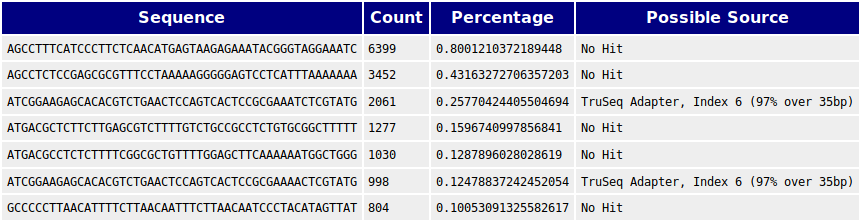</center>
<br>

This Overrepresented sequences module is related to the Sequence duplication one above. Certain types of sequencing are expected to produce duplicate sequences, and they may be listed here if they comprise more than 0.1% of the total. But just because we expect some to show up doesn't mean we should ignore this output either.

**Looking at the table above:**

1. What do you notice about some of the reported overrepresented sequences?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>

Two of them are listed as likely coming from an adapter, which also may show up in the next module.

</details>
</div>

<br>

---

- [**Adapter content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/10%20Adapter%20Content.html)
  - The sequences of common adapters are searched and reported if they are found in the reads.

<center>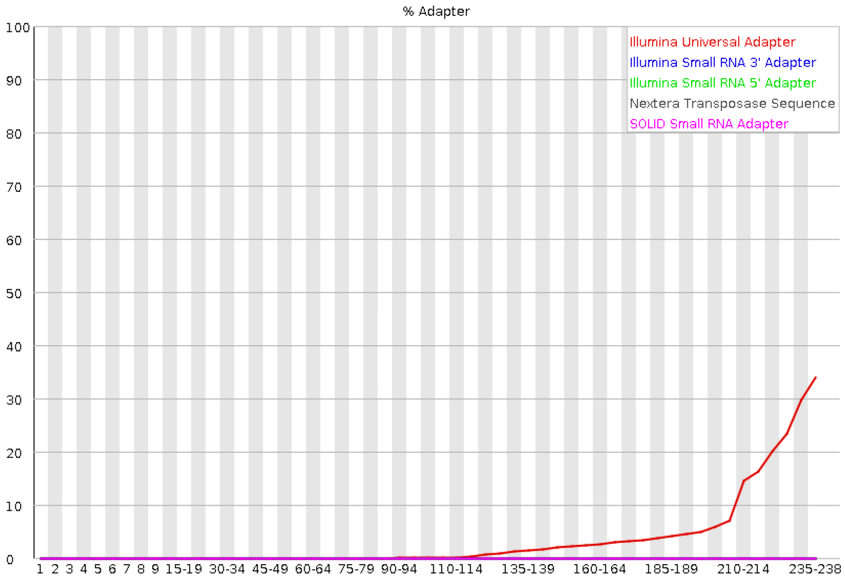</center>
<br>

**Looking at the adapter content plot above:**

1. Are there adapters detected in this sample? If so, which type of adapters are detected?

2. Do you think the adapters should be considered when quality trimming our data? Why or why not?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>

Yes. Illumina Universal Adapters are detected.

</details>
</div>


<div class="alert alert-block alert-success">
<details>
<summary><b>Q2 Solution</b></summary>

<br>

Yes. Adapters are not biological, so we want to be sure they are removed in the quality-filtering step.

</details>
</div>

<br>

---

At the end of the fastqc report, these modules are summarized in an html report in a Pass (green check), Warning (yellow exclamation point), and Fail (red X) fashion. 

**It is important to remember that although these modules are summarized in a pass/fail fashion, those indicators are based on expecting the input sequencing data are completely random and diverse, which is often not the case depending on the type of sequencing that was done.** 

For instance, as mentioned above, if we are working with amplicon data (where we deliberately amplified and sequenced many copies of one gene type), or whole-genome sequencing of just one genome, these are not random and diverse sets of sequences. In these cases, some of these modules might be assessed as "Fail" by the FastQC modules, e.g.:

<center>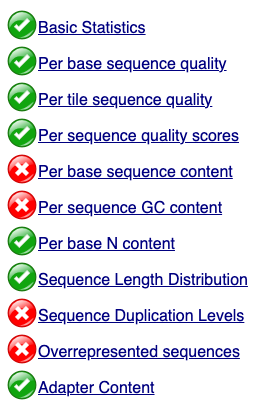</center>
<br>

Seeing any given module marked as "Fail" by FastQC doesn't by itself mean there is necessarily anything wrong with our data. Frequently, the common causes for a particular module to fail or have a warning are noted in the [FastQC documentation pages](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/), so it can help to begin looking there if you are unsure.

<div class="alert alert-block alert-info">

**FastQC provides a powerful way to summarize the quality of our data, but it's important to interpret the results within the context of what type of data we are working with.**

</div>


---
---

[**Previous:** 3. R intro](03-R-intro.ipynb)
<br>

<div style="text-align: right"><a href="01-jupyter-intro.ipynb"><b>Back to:</b> 1. Jupyter intro</a></div>
